In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import shap

c:\Users\shaak\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load dataset from UCI repository
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(dataset_url, delimiter=';')

# Display basic dataset info
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Data preprocessing (Assuming target variable is 'quality')
X = df.drop(columns=['quality'])
y = df['quality']
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:


# Train a simple model (Linear Regression)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Print the linear regression equation
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_
equation = "Quality = {:.2f}".format(intercept)
for feature, coef in zip(X.columns, coefficients):
    equation += " + ({:.2f} * {})".format(coef, feature)
print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
Quality = 14.36 + (0.02 * fixed acidity) + (-1.00 * volatile acidity) + (-0.14 * citric acid) + (0.01 * residual sugar) + (-1.81 * chlorides) + (0.01 * free sulfur dioxide) + (-0.00 * total sulfur dioxide) + (-10.35 * density) + (-0.39 * pH) + (0.84 * sulphates) + (0.28 * alcohol)


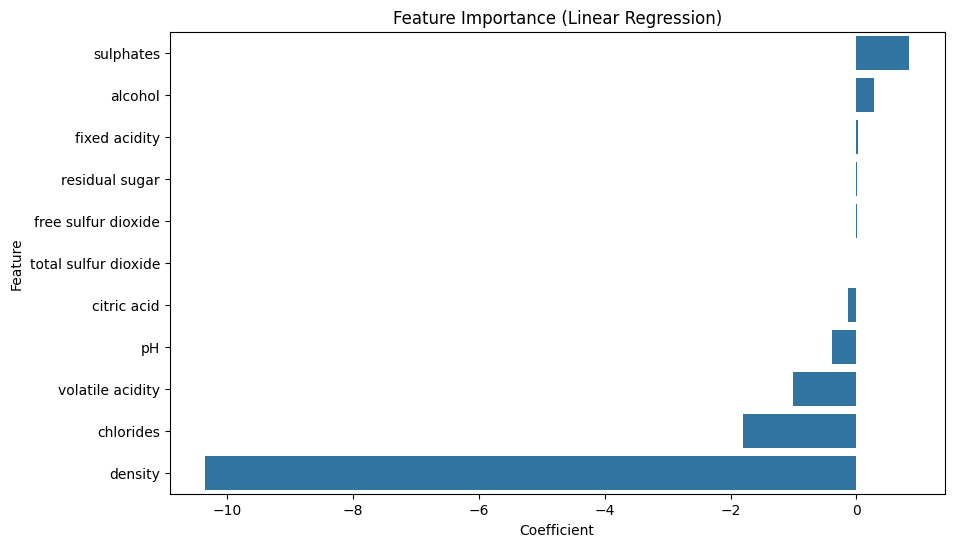

In [8]:
# Feature importance via correlation
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Linear Regression)')
plt.show()

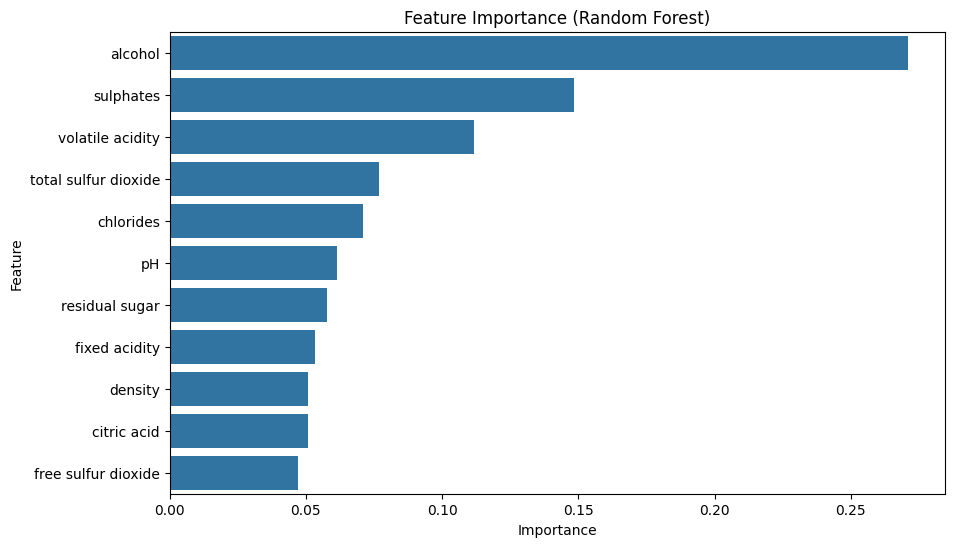


Partial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.


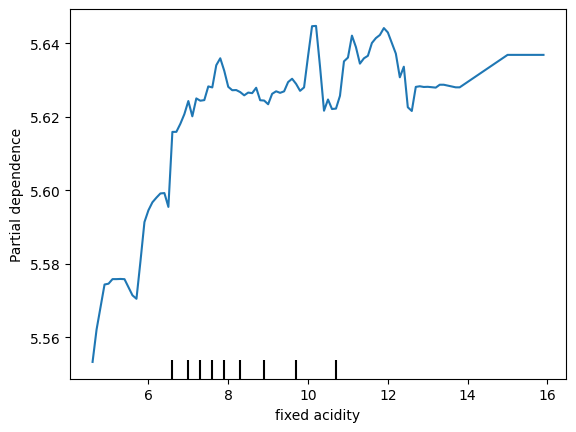

In [10]:
# Train a more complex model (Random Forest)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance for complex model
importances = rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Partial Dependence Plot for a single feature
print("\nPartial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.")
feature_idx = 0  # Change this to visualize different features
PartialDependenceDisplay.from_estimator(rf, X_train, [feature_idx])
plt.show()

In [ ]:
# SHAP values for Random Forest
explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)